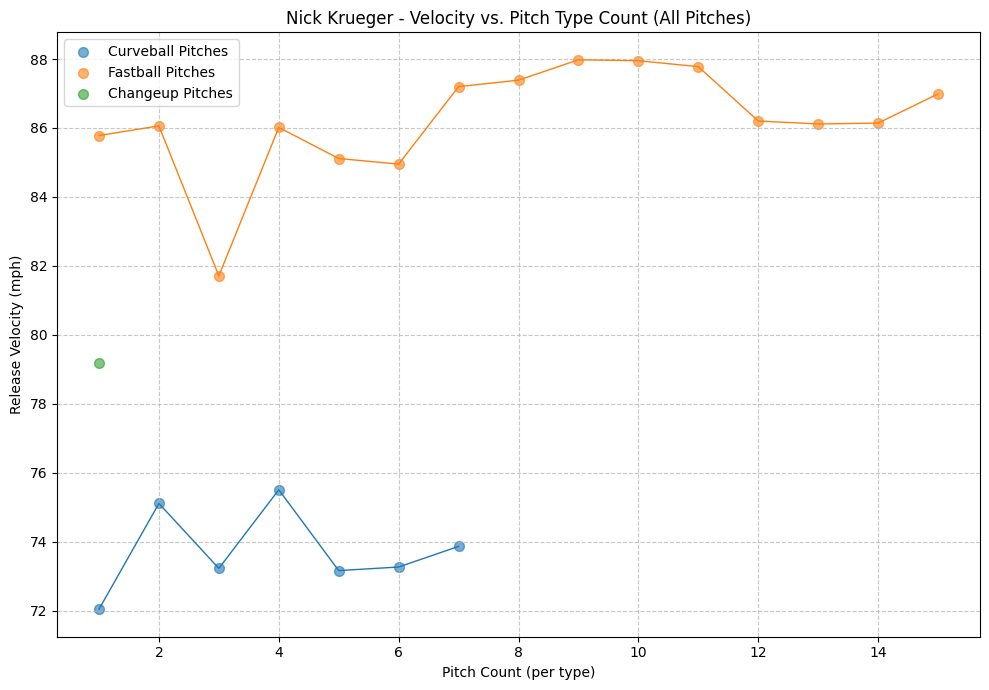

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_pitch_velocity_with_line(pitcher_name, data_path='your_data.csv'):
    # Load the dataset
    data = pd.read_csv(data_path)
    
    # Filter data for the specified pitcher
    pitcher_data = data[data['Pitcher'] == pitcher_name]
    
    if pitcher_data.empty:
        print(f"No data found for pitcher: {pitcher_name}")
        return
    
    # Get unique pitch types for this pitcher
    pitch_types = pitcher_data['TaggedPitchType'].unique()
    
    if len(pitch_types) == 0:
        print(f"No pitch types found for pitcher: {pitcher_name}")
        return
    
    plt.figure(figsize=(10, 7))
    
    # Plot each pitch type on the same figure
    for pitch_type in pitch_types:
        pitch_type_data = pitcher_data[pitcher_data['TaggedPitchType'] == pitch_type].sort_values('PitchNo')
        if pitch_type_data.empty:
            continue
        pitch_type_data = pitch_type_data.copy()
        pitch_type_data['PitchTypeCount'] = range(1, len(pitch_type_data) + 1)
        
        plt.scatter(
            pitch_type_data['PitchTypeCount'],
            pitch_type_data['RelSpeed'],
            alpha=0.6,
            s=50,
            label=f'{pitch_type} Pitches'
        )
        plt.plot(
            pitch_type_data['PitchTypeCount'],
            pitch_type_data['RelSpeed'],
            linestyle='-',
            linewidth=1
        )
    
    plt.title(f'{pitcher_name} - Velocity vs. Pitch Type Count (All Pitches)')
    plt.xlabel('Pitch Count (per type)')
    plt.ylabel('Release Velocity (mph)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'velocity_holding/{pitcher_name}_all_pitches_velocity_with_line.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
# Example usage
if __name__ == "__main__":
    # Replace 'your_data.csv' with the actual path to your dataset
    data_path = '../KCL/Data/6-25bm.csv'
    pitcher_name = "Carter Sellers"  # Replace with desired pitcher name
    plot_pitch_velocity_with_line(pitcher_name, data_path)